In [1]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


**1. Loading Data:**

The dataset is borrowed from Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector .

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).

The overview of this dataset is, it has 11054 samples with 32 features. Download the dataset from the link provided.

In [2]:
# loading dataset
df = pd.read_csv('phishing.csv')

In [3]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [4]:
# shape of the dataset
df.shape

(11054, 32)

In [5]:
# list the statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,11054.0,5526.500000,3191.159272,0.0,2763.25,5526.5,8289.75,11053.0
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.00,1.0,1.00,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.00,-1.0,-1.00,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.00,1.0,1.00,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.00,1.0,1.00,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.00,1.0,1.00,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.00,-1.0,-1.00,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.00,0.0,1.00,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.00,1.0,1.00,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.00,-1.0,1.00,1.0


In [6]:
# listing the feature of the dataset
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [7]:
# Information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [8]:
# nunique value in columns
df.nunique()

,0
Index,11054
UsingIP,2
LongURL,3
ShortURL,2
Symbol@,2
Redirecting//,2
PrefixSuffix-,2
SubDomains,3
HTTPS,3
DomainRegLen,2


In [9]:
df = df.drop(['Index'],axis = 1)

**Visualizing data**

Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.



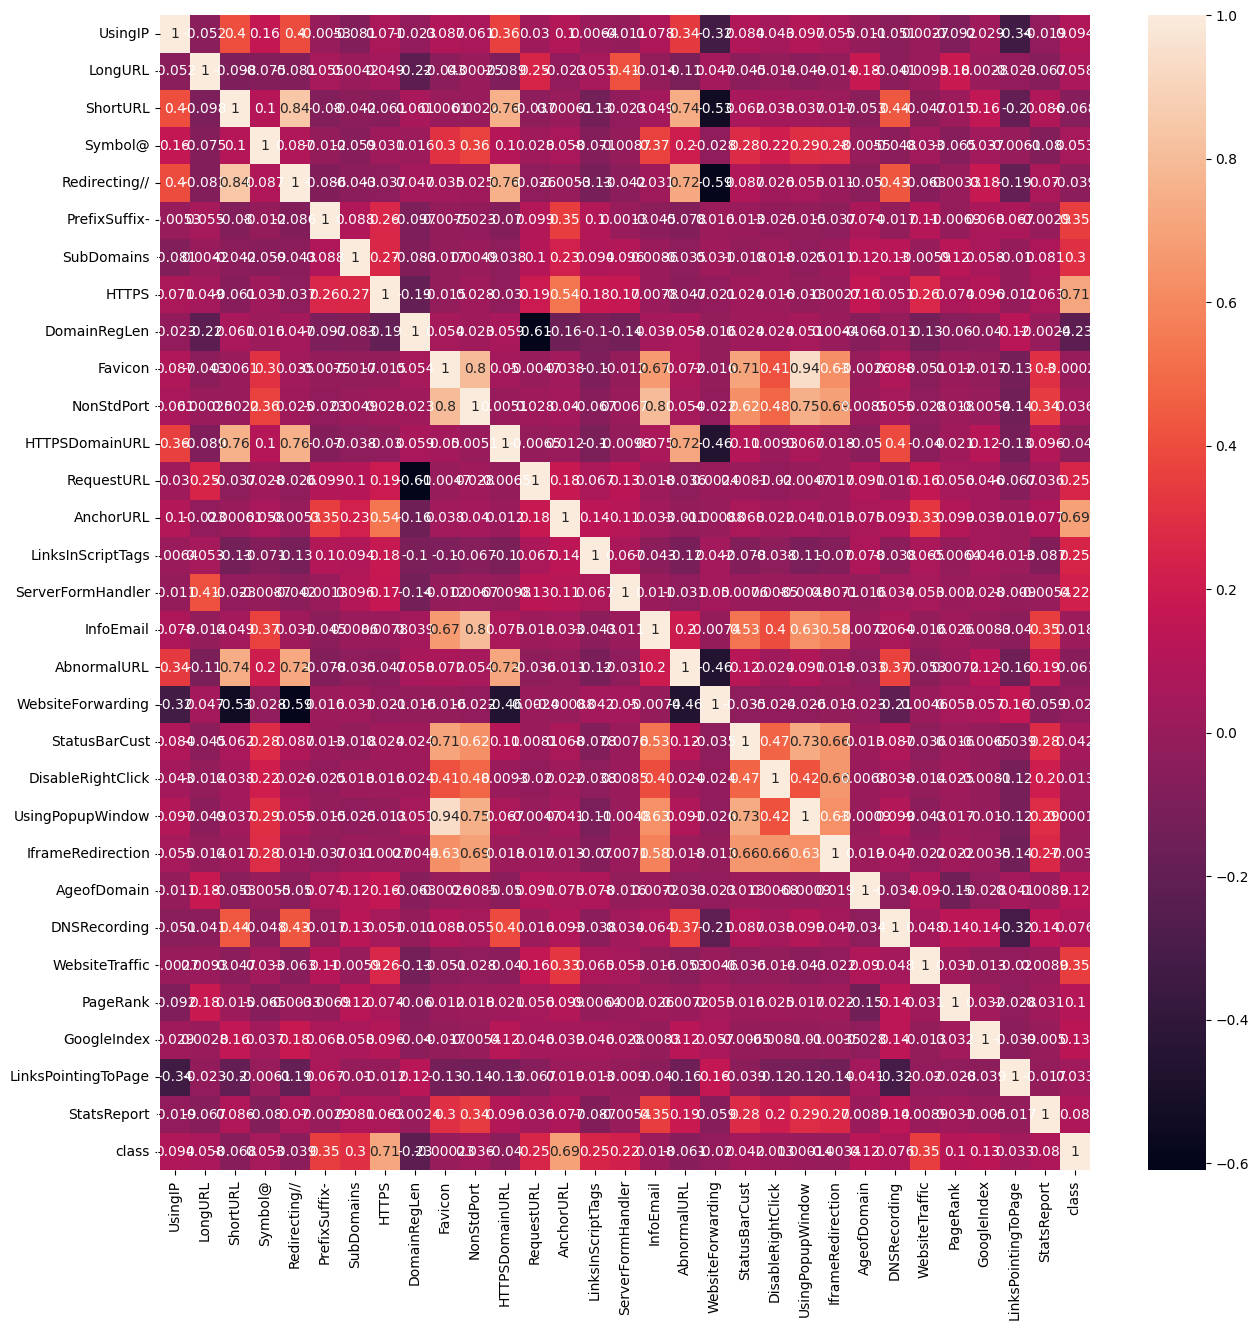

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

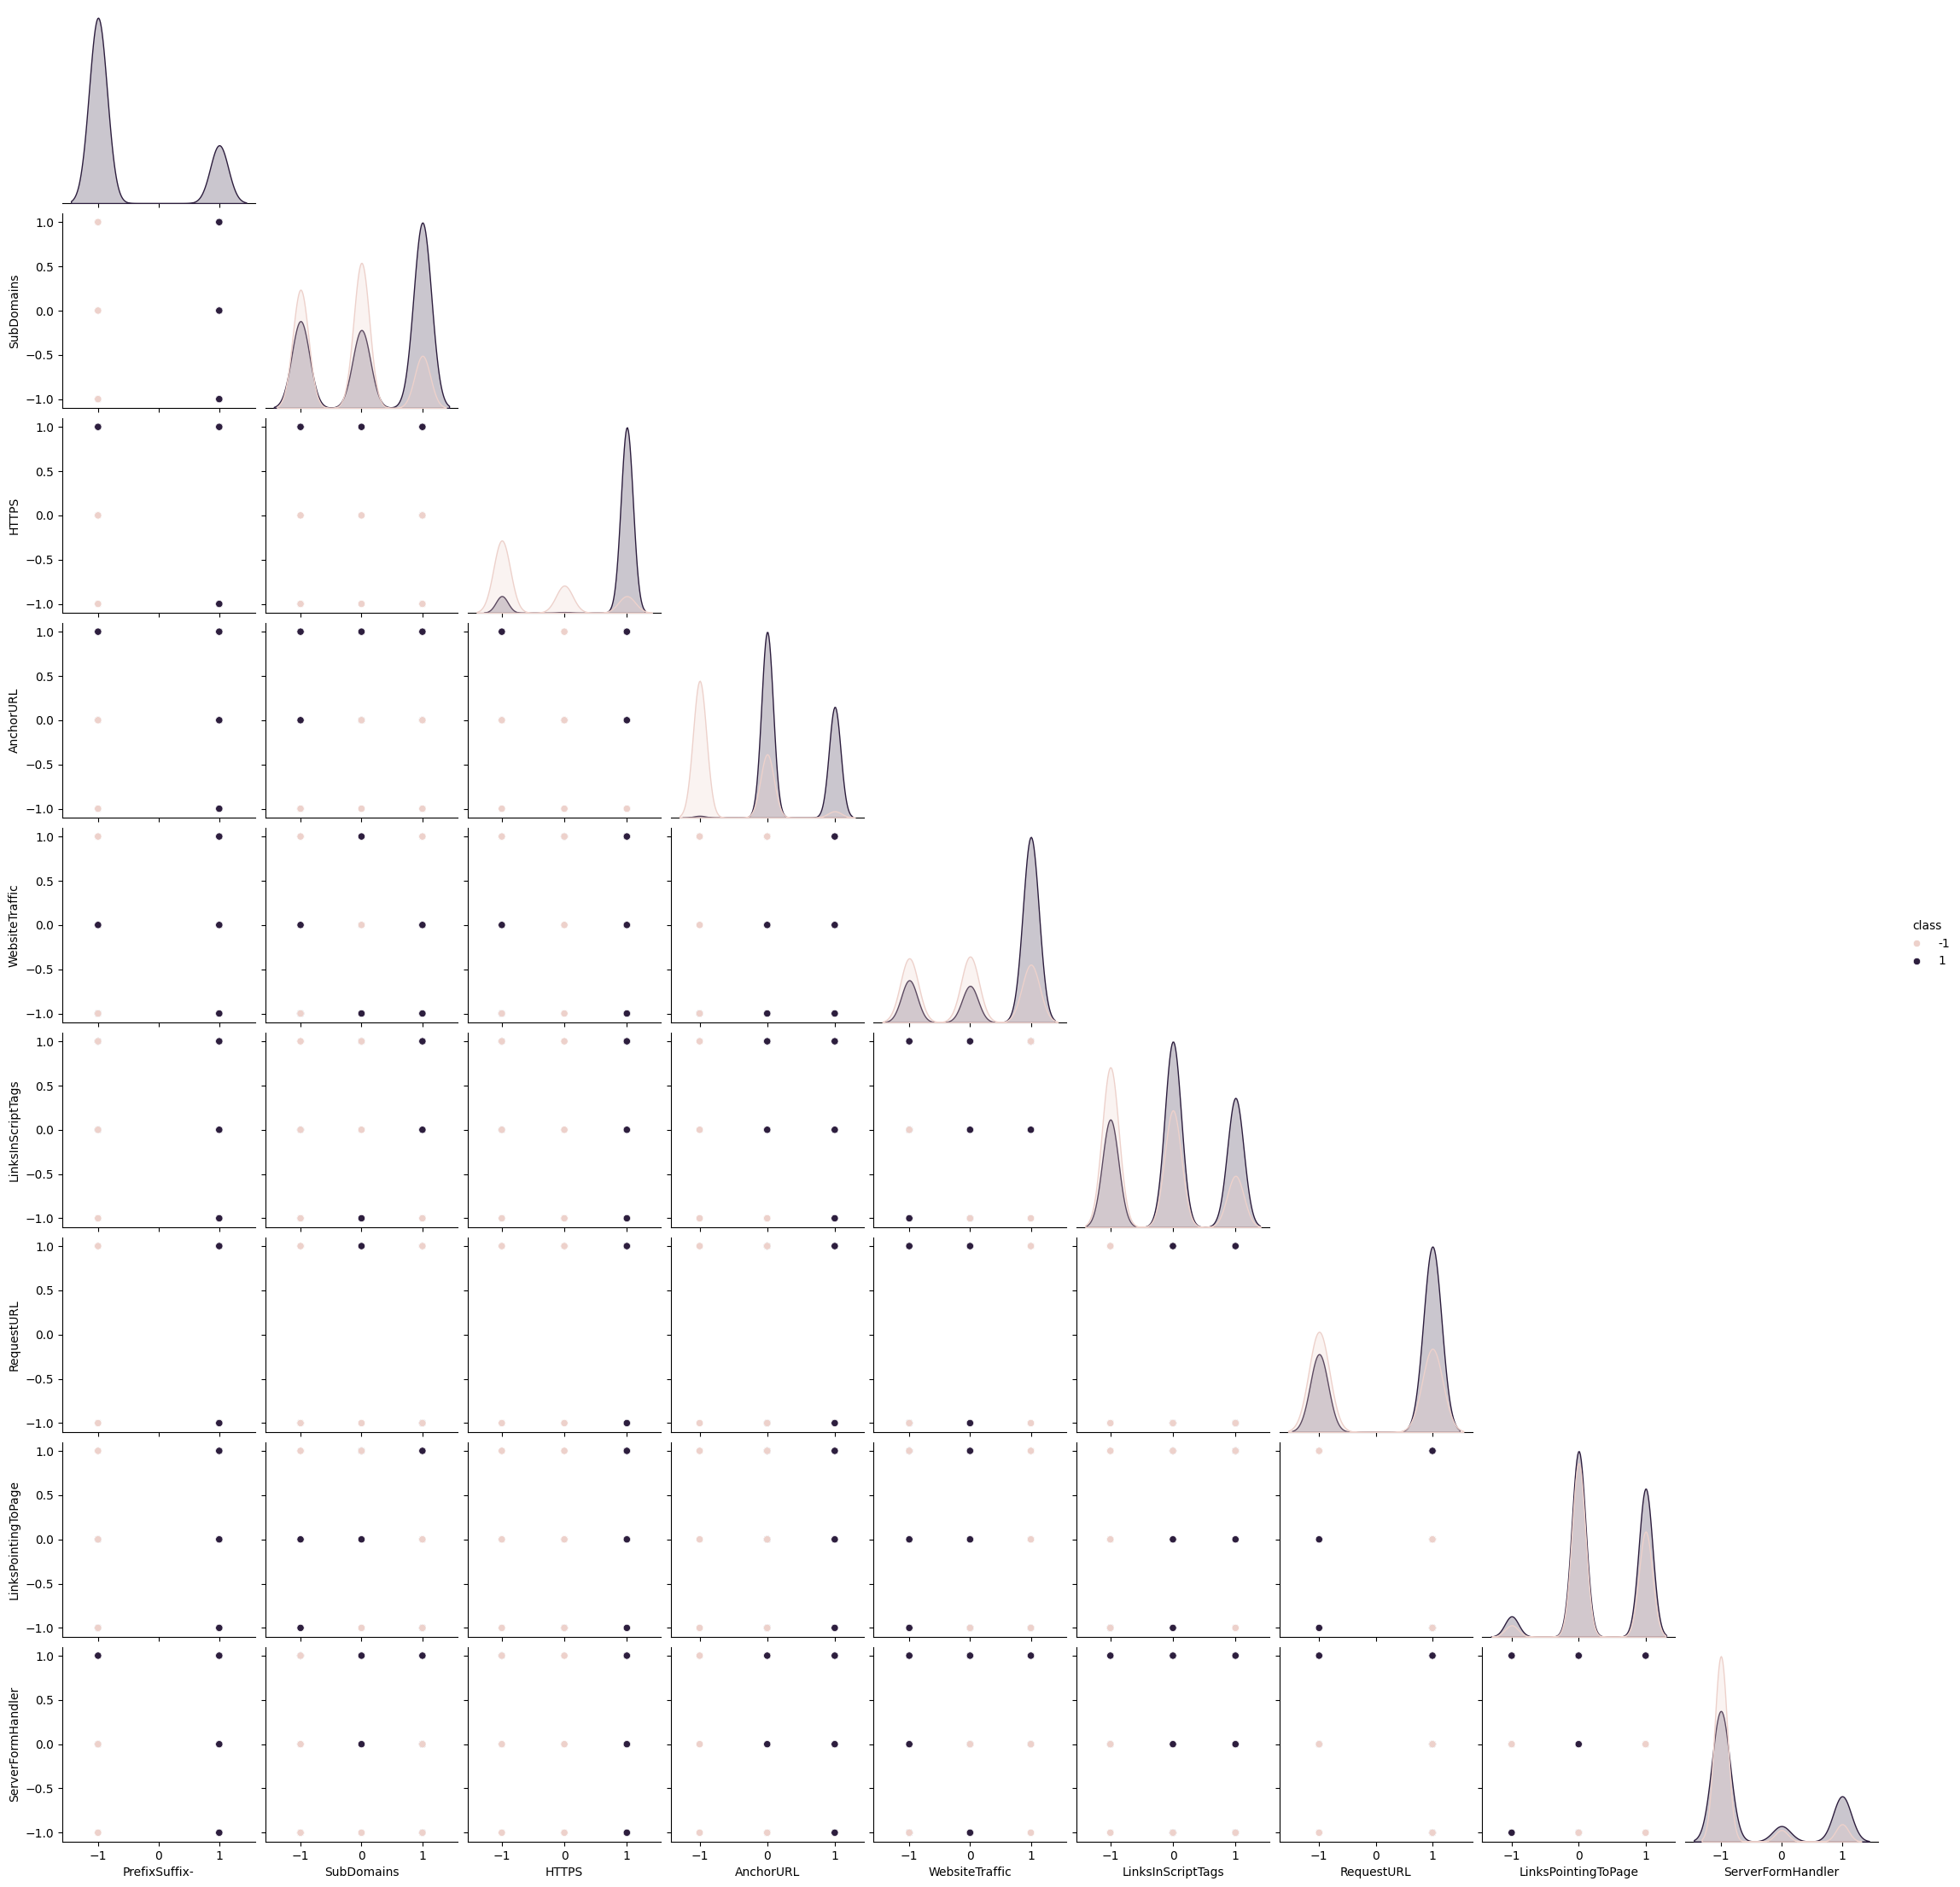

In [11]:
# pair plot for particular  feature
data = df[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','LinksInScriptTags','RequestURL','LinksPointingToPage','ServerFormHandler','class']]
sns.pairplot(data, hue='class',corner=True)

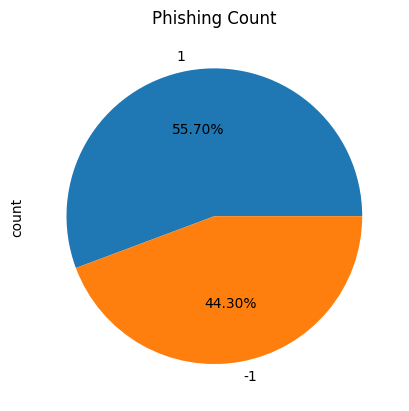

In [12]:
# phishing count in pie chart
data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Phishing Count')
plt.show()

In [13]:
# splitting the data into dependant and independant feature
X = data.drop(['class'],axis=1)
y = data['class']

In [14]:
# spliting the dataset into train and test  data 80-20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 9), (8843,), (2211, 9), (2211,))


Model Building & Training:


In [15]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1)

# fit the model
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [16]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [17]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_forest)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.954
Random Forest : Accuracy on test Data: 0.946

Random Forest : f1_score on training Data: 0.958
Random Forest : f1_score on test Data: 0.952

Random Forest : Recall on training Data: 0.961
Random Forest : Recall on test Data: 0.954

Random Forest : precision on training Data: 0.956
Random Forest : precision on test Data: 0.949


In [18]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))


              precision    recall  f1-score   support

          -1       0.94      0.94      0.94       976
           1       0.95      0.95      0.95      1235

    accuracy                           0.95      2211
   macro avg       0.95      0.94      0.94      2211
weighted avg       0.95      0.95      0.95      2211



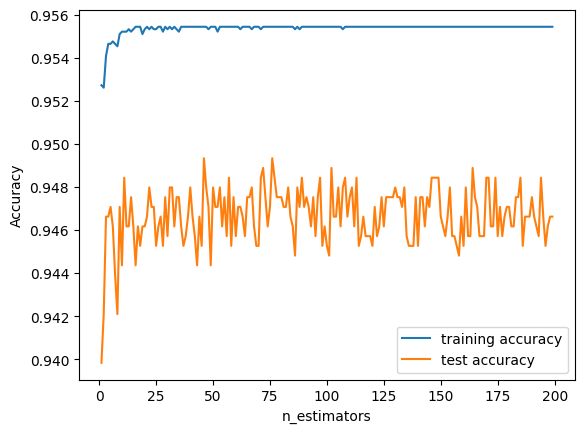

In [19]:
training_accuracy = []
test_accuracy = []

depth = range(1,200)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))


#plotting the training & testing accuracy for n_estimators from 1 to 200
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend();

In [20]:
# save the feature_names and the phishng models laters to use
import joblib
import json
joblib.dump(forest, "phishing_rf_model.joblib")
with open("feature_names.json", "w") as f:
    json.dump({"feature_names": X.columns.tolist()}, f)

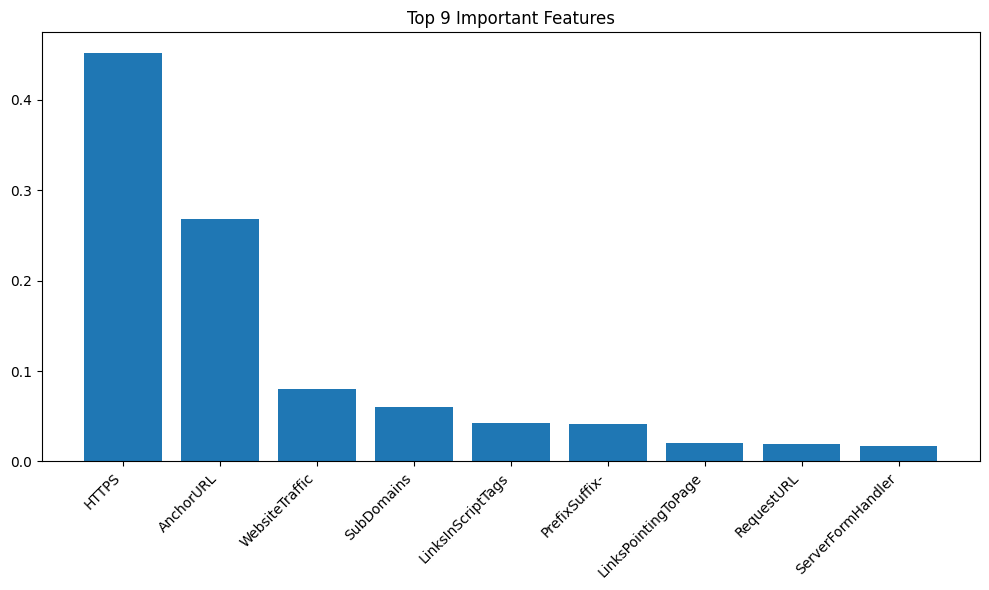


🔥 Top 9 Important Features:
HTTPS: 0.4523
AnchorURL: 0.2685
WebsiteTraffic: 0.0797
SubDomains: 0.0598
LinksInScriptTags: 0.0424
PrefixSuffix-: 0.0417
LinksPointingToPage: 0.0200
RequestURL: 0.0187
ServerFormHandler: 0.0167


In [23]:
# Feature importances from RandomForest
importances = forest.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]

# Determine how many features to plot (max 10)
num_features = min(10, len(importances))

# Plot the top features
plt.figure(figsize=(10, 6))
plt.bar(range(num_features), importances[sorted_idx[:num_features]], align="center")
plt.xticks(range(num_features), feature_names[sorted_idx[:num_features]], rotation=45, ha="right")
plt.title(f"Top {num_features} Important Features")
plt.tight_layout()
plt.show()

# Print the top features
print(f"\n🔥 Top {num_features} Important Features:")
for i in sorted_idx[:num_features]:
    print(f"{feature_names[i]}: {importances[i]:.4f}")
